In [6]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [7]:
# Importing data set
hdp=pd.read_csv(r"/content/drive/MyDrive/colab/HeartDisease.csv")

In [9]:
hdp.head() # Gives top 5 rows

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
hdp.info() # gives the information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
hdp.describe() # Gives the statistical information of variables

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
hdp.isnull().sum() # Checking for null values

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<Axes: xlabel='target', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

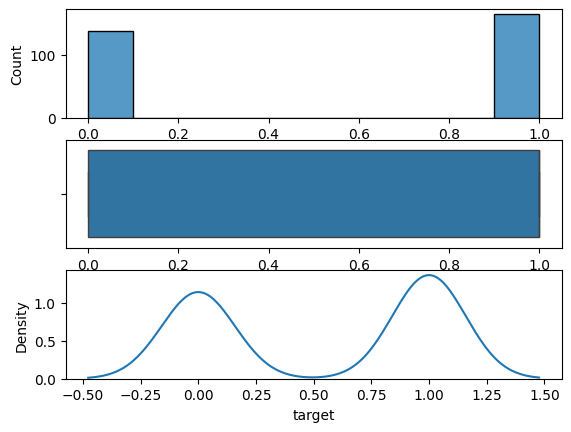

In [13]:
# Ploting the target variable
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(hdp.target,ax=ax[0])
sns.boxplot(hdp.target,orient="h",ax=ax[1])
sns.kdeplot(hdp.target,ax=ax[2])

<Axes: xlabel='cholestrol', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

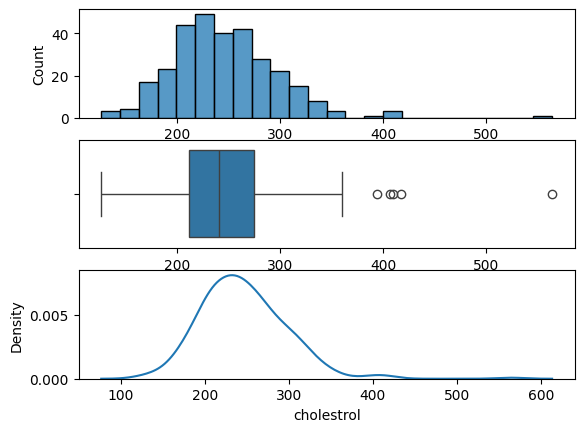

In [14]:
# # Ploting the cholestrol variable
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(hdp.cholestrol,ax=ax[0])
sns.boxplot(hdp.cholestrol,orient="h",ax=ax[1])
sns.kdeplot(hdp.cholestrol,ax=ax[2])

<Axes: xlabel='fasting_blood_sugar', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

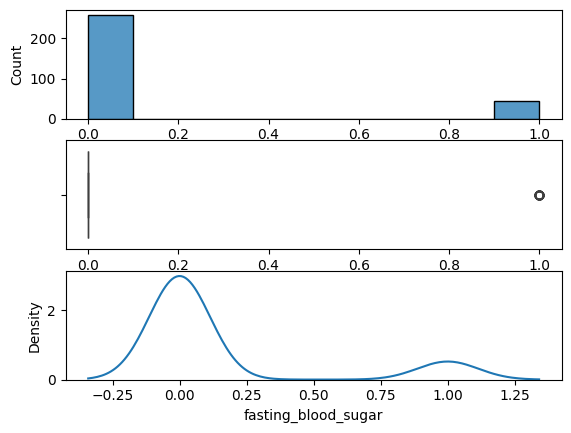

In [15]:
# Ploting the fasting_blood_sugar variable
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(hdp.fasting_blood_sugar,ax=ax[0])
sns.boxplot(hdp.fasting_blood_sugar,orient="h",ax=ax[1])
sns.kdeplot(hdp.fasting_blood_sugar,ax=ax[2])

<Axes: ylabel='Frequency'>

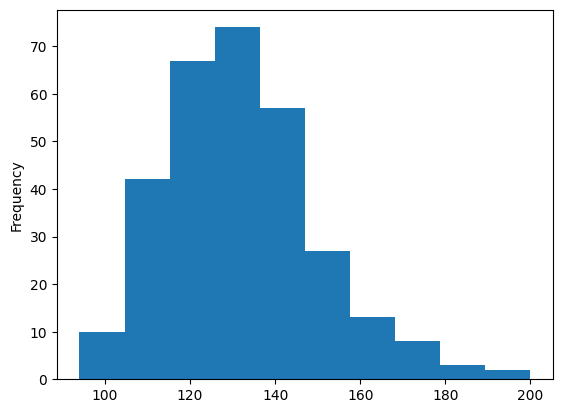

In [16]:
hdp.rest_bps.plot(kind="hist") # histogram of rest_bps 

<Axes: ylabel='Frequency'>

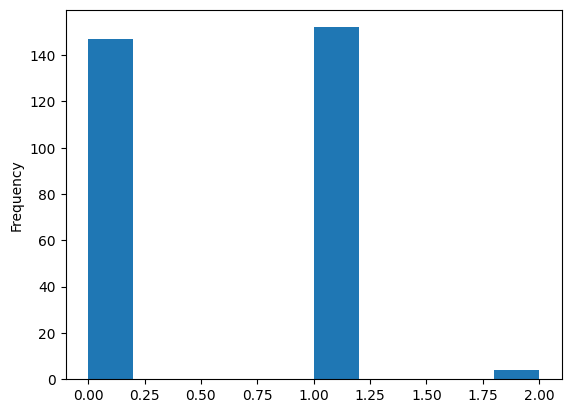

In [17]:
hdp.rest_ecg.plot(kind="hist")  # histogram of rest_ecg

In [19]:
hdp.gender.value_counts() # Checking for value counts

1    207
0     96
Name: gender, dtype: int64

In [20]:
hdp.gender=hdp.gender.astype("object") # changing the data type to object

In [21]:
hdp.chest_pain.value_counts() # Checking for value counts

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

In [22]:
hdp.chest_pain=hdp.chest_pain.astype("object") # changing the data type to object

In [23]:
hdp.rest_bps.value_counts() # Checking for value counts

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: rest_bps, dtype: int64

In [24]:
hdp.cholestrol.value_counts() # Checking for value counts

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: cholestrol, Length: 152, dtype: int64

In [25]:
hdp.rest_ecg.value_counts() # Checking for value counts

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

In [26]:
hdp.rest_ecg=hdp.rest_ecg.astype("object") # changing the data type to object

In [27]:
hdp.exer_angina.value_counts() # Checking for value counts

0    204
1     99
Name: exer_angina, dtype: int64

In [28]:
hdp.exer_angina=hdp.exer_angina.astype("object") # changing the data type to object

In [29]:
hdp.slope.value_counts() # Checking for value counts

2    142
1    140
0     21
Name: slope, dtype: int64

In [30]:
hdp.slope=hdp.slope.astype("object") # changing the data type to object

In [31]:
hdp.ca.value_counts() # Checking for value counts

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [32]:
hdp.ca=hdp.ca.astype("object") # changing the data type to object

In [33]:
hdp.thalassemia.value_counts() # Checking for value counts

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64

In [34]:
hdp.thalassemia=hdp.thalassemia.astype("object")

<Axes: ylabel='slope'>

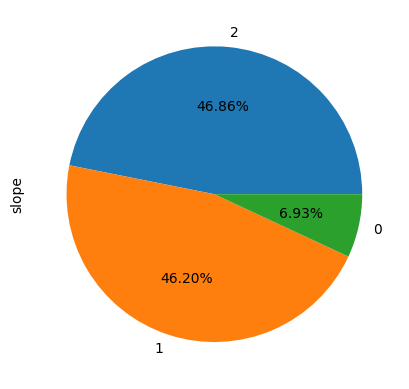

In [36]:
hdp.slope.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='thalassemia'>

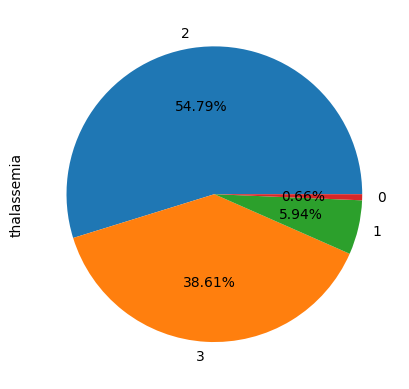

In [37]:
hdp.thalassemia.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='ca'>

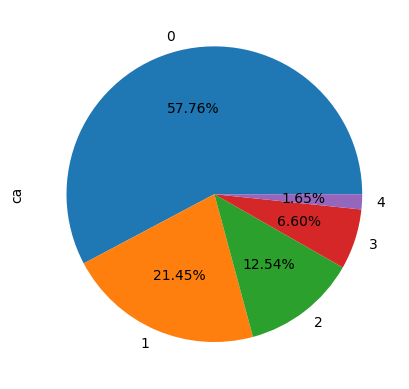

In [38]:
hdp.ca.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: xlabel='chest_pain'>

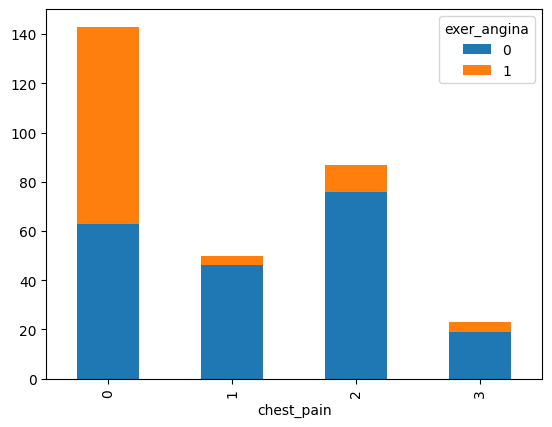

In [39]:
pd.crosstab(hdp.chest_pain,hdp.exer_angina).plot(kind="bar",stacked=True)

<Axes: xlabel='thalassemia'>

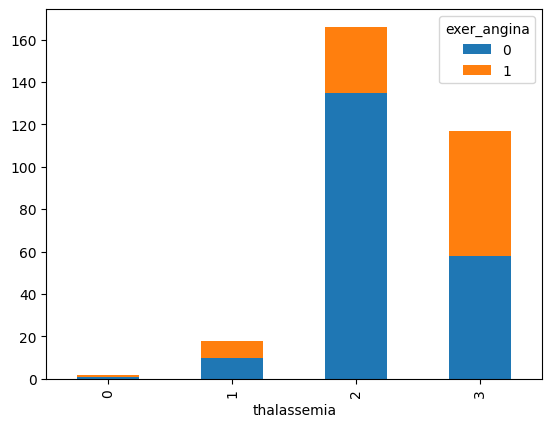

In [40]:
pd.crosstab(hdp.thalassemia,hdp.exer_angina).plot(kind="bar",stacked=True)

groupby()-mean of following-age and target,chest_pain and age

In [41]:
hdp.age.groupby(hdp.target).mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

In [42]:
hdp.age.groupby(hdp.chest_pain).mean()

chest_pain
0    55.692308
1    51.360000
2    53.517241
3    55.869565
Name: age, dtype: float64

## Hypothesis Testing

test null average age and target,thalach and exer_angina

In [43]:
hdp.age.groupby(hdp.target).mean()

target
0    56.601449
1    52.496970
Name: age, dtype: float64

In [44]:
hdp.age.groupby(hdp.target).var()

target
0    63.394742
1    91.214930
Name: age, dtype: float64

In [45]:
# Null - There is no Significant difference in Average age
# for targe(patient has heart disease or not)
# Alt - There is Significant difference in Average age
# for target(patient has heart disease or not)

In [46]:
one=hdp[hdp.target==1]
zero=hdp[hdp.target==0]

In [47]:
from scipy.stats import ttest_ind

In [48]:
ttest_ind(one.age,zero.age,equal_var=False)

TtestResult(statistic=-4.079669145481814, pvalue=5.781030372508417e-05, df=300.99793547586876)

In [49]:
# since pvalue=5.781030372508417e-05 is lessthan 0.05 we reject null
# we may conclude that There is Significant difference in Average age
# for target(patient has heart disease or not)

test null average thalach and exer_angina

In [50]:
hdp.thalach.groupby(hdp.exer_angina).mean()

exer_angina
0    155.681373
1    137.212121
Name: thalach, dtype: float64

In [51]:
hdp.thalach.groupby(hdp.exer_angina).var()

exer_angina
0    454.021129
1    444.291280
Name: thalach, dtype: float64

In [52]:
# Null - There is no Significant difference in Average thalach
# for exer_angina
# Alt - There is Significant difference in Average thalach
# for exer_angina

In [53]:
zero=hdp[hdp.exer_angina==0]
one=hdp[hdp.exer_angina==1]

In [54]:
ttest_ind(one.thalach,zero.thalach,equal_var=False)

TtestResult(statistic=-7.128177921857431, pvalue=1.903716177442514e-11, df=196.02842365581822)

In [55]:
# since pvalue=1.903716177442514e-11 is lessthan 0.05 we reject null hypothesis

Test null average rest_bps and chest_pain

In [56]:
hdp.rest_bps.groupby(hdp.chest_pain).mean()

chest_pain
0    132.020979
1    128.400000
2    130.379310
3    140.869565
Name: rest_bps, dtype: float64

In [57]:
# Null - There is no Significant difference in Average rest_bps
# for chest_pain
# Alt - There is Significant difference in Average rest_bps
# for chest_pain

In [58]:
zero=hdp[hdp.chest_pain==0]
one=hdp[hdp.chest_pain==1]
two=hdp[hdp.chest_pain==2]
three=hdp[hdp.chest_pain==3]

In [59]:
from scipy.stats import f_oneway

In [60]:
f_oneway(zero.rest_bps,one.rest_bps,two.rest_bps,three.rest_bps)

F_onewayResult(statistic=2.9189226279883567, pvalue=0.0343971208939314)

In [61]:
# since pvalue=0.0343971208939314 is lessthan 0.05 we reject null hypothesis

Test Null No Association between target and thalassemia

In [62]:
from scipy.stats import chi2_contingency

In [63]:
# Null - There is No Association between target and thalassemia
# Alt - There is Association between target and thalassemia

In [64]:
chi2_contingency(pd.crosstab(hdp.target,hdp.thalassemia))

Chi2ContingencyResult(statistic=85.30373951466149, pvalue=2.233350721012921e-18, dof=3, expected_freq=array([[ 0.91089109,  8.1980198 , 75.6039604 , 53.28712871],
       [ 1.08910891,  9.8019802 , 90.3960396 , 63.71287129]]))

In [65]:
# since pvalue=2.233350721012921e-18 is lessthan 0.05 we reject null hypothesis

In [66]:
# Spliting the columns into numeric columns and object columns
numcols=hdp.select_dtypes(include=np.number)
objcols=hdp.select_dtypes(include="object")

In [67]:
numcols.head()

,age,rest_bps,cholestrol,fasting_blood_sugar,thalach,old_peak,target
0,63,145,233,1,150,2.3,1
1,37,130,250,0,187,3.5,1
2,41,130,204,0,172,1.4,1
3,56,120,236,0,178,0.8,1
4,57,120,354,0,163,0.6,1


In [68]:
objcols.head()

,gender,chest_pain,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,0,0,0,0,1
1,1,2,1,0,0,0,2
2,0,1,0,0,2,0,2
3,1,1,1,0,2,0,2
4,0,0,1,1,2,0,2


In [69]:
print(numcols.shape)
print(objcols.shape)

(303, 7)
(303, 7)


In [70]:
y=numcols.target # Assigning target variable to y

In [71]:
numcols=numcols.drop("target",axis=1) # dropping target variable from numeric columns

In [72]:
numcols.head() 

,age,rest_bps,cholestrol,fasting_blood_sugar,thalach,old_peak
0,63,145,233,1,150,2.3
1,37,130,250,0,187,3.5
2,41,130,204,0,172,1.4
3,56,120,236,0,178,0.8
4,57,120,354,0,163,0.6


In [73]:
numcols.corr() # Checking correlation of numcols

,age,rest_bps,cholestrol,fasting_blood_sugar,thalach,old_peak
age,1.000000,0.279351,0.213678,0.121308,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,0.177531,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,0.013294,-0.009940,0.053952
fasting_blood_sugar,0.121308,0.177531,0.013294,1.000000,-0.008567,0.005747
thalach,-0.398522,-0.046698,-0.009940,-0.008567,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,0.005747,-0.344187,1.000000


In [74]:
# Scalling the numeric columns
sklearn.preprocessing import MinMaxScaler

In [75]:
minmax=MinMaxScaler()

In [76]:
numcols_minmax=minmax.fit_transform(numcols)

In [77]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [78]:
numcols_minmax.head()

,age,rest_bps,cholestrol,fasting_blood_sugar,thalach,old_peak
0,0.708333,0.481132,0.244292,1.0,0.603053,0.370968
1,0.166667,0.339623,0.283105,0.0,0.885496,0.564516
2,0.250000,0.339623,0.178082,0.0,0.770992,0.225806
3,0.562500,0.245283,0.251142,0.0,0.816794,0.129032
4,0.583333,0.245283,0.520548,0.0,0.702290,0.096774


In [125]:
X=pd.concat([numcols_minmax,objcols],axis=1)

In [126]:
X

,age,rest_bps,cholestrol,fasting_blood_sugar,thalach,old_peak,gender,chest_pain,rest_ecg,exer_angina,slope,ca,thalassemia
0,0.708333,0.481132,0.244292,1.0,0.603053,0.370968,1,3,0,0,0,0,1
1,0.166667,0.339623,0.283105,0.0,0.885496,0.564516,1,2,1,0,0,0,2
2,0.250000,0.339623,0.178082,0.0,0.770992,0.225806,0,1,0,0,2,0,2
3,0.562500,0.245283,0.251142,0.0,0.816794,0.129032,1,1,1,0,2,0,2
4,0.583333,0.245283,0.520548,0.0,0.702290,0.096774,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.0,0.396947,0.032258,0,0,1,1,1,0,3
299,0.333333,0.150943,0.315068,0.0,0.465649,0.193548,1,3,1,0,1,0,3
300,0.812500,0.471698,0.152968,1.0,0.534351,0.548387,1,0,1,0,1,2,3
301,0.583333,0.339623,0.011416,0.0,0.335878,0.193548,1,0,1,1,1,1,3


In [146]:
y=pd.DataFrame(y)

In [150]:
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [138]:
# Splitting the data set into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [157]:
# now lets make  the ANN

In [169]:
# Initialising the ANN
classifier = Sequential()

In [170]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=13))

In [171]:
# Adding the Second hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

In [172]:
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [173]:
# Compiling ANN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [175]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 13ms/step - loss: 0.5341 - accuracy: 0.7963 - val_loss: 0.4991 - val_accuracy: 0.8000
Epoch 2/50
17/17 [==============================] - 0s 17ms/step - loss: 0.5272 - accuracy: 0.7716 - val_loss: 0.4922 - val_accuracy: 0.7750
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.7716 - val_loss: 0.4836 - val_accuracy: 0.7750
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7901 - val_loss: 0.4740 - val_accuracy: 0.8125
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 0.7963 - val_loss: 0.4662 - val_accuracy: 0.8250
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.8025 - val_loss: 0.4587 - val_accuracy: 0.8250
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.4945 - accuracy: 0.8086 - val_loss: 0.4509 - val_accuracy: 0.8375
Epoch 8/50
17/17 [

In [ ]:
# List all data in history

In [176]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Summarize history for loss

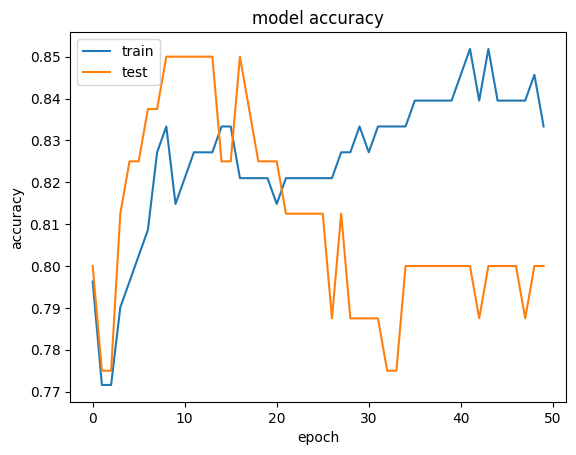

In [182]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

## Making Predictions and Evaluating the model

In [ ]:
# Predicting the test set results

In [185]:
y_pred=classifier.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [186]:
y_pred=(y_pred>0.5)

In [ ]:
# Making Confussion Matrix

In [187]:
from sklearn.metrics import confusion_matrix

In [192]:
confusion_matrix(y_test,y_pred)

array([[26,  3],
       [ 6, 26]])

In [ ]:
# calculating accuracy

In [195]:
from sklearn.metrics import accuracy_score

In [197]:
accuracy_score(y_pred,y_test)

0.8524590163934426